# Building IoT 2024

## Tensorflow Metal

In [ ]:
import warnings
import tensorflow as tf

warnings.filterwarnings('ignore')
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

## Synthetische Daten

In [2]:
import numpy as np

# Generate random angles between 0 and 2*pi
angles = np.random.rand(1000) * np.pi / 2

# Create dataset
x = np.arange(0, np.pi * 2, 0.1)
y = np.sin(x)

## Model

In [24]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pylab as plt

# Create dataset
x = np.arange(0, np.pi * 2, 0.1)
y = np.sin(x)

# Some parameters
ACTIVE_FUN = 'tanh'
BATCH_SIZE = 1

# Create the model
model = Sequential()
layer1 = model.add(Dense(5, input_shape=(1,), activation=ACTIVE_FUN, name="hidden1"))
model.add(Dense(5, activation=ACTIVE_FUN, name="hidden2"))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mean_squared_error'])

## Model tranieren

In [25]:
VERBOSE=0

# Compile the model
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mean_squared_error'])

# Fit the model
model.fit(x, y, epochs=100, batch_size=BATCH_SIZE, verbose=VERBOSE)
model.save("tf.sine.h5")

## Vorgersage

mean_squared_error: 100.80%
10/10 [==============================] - 0s 2ms/step


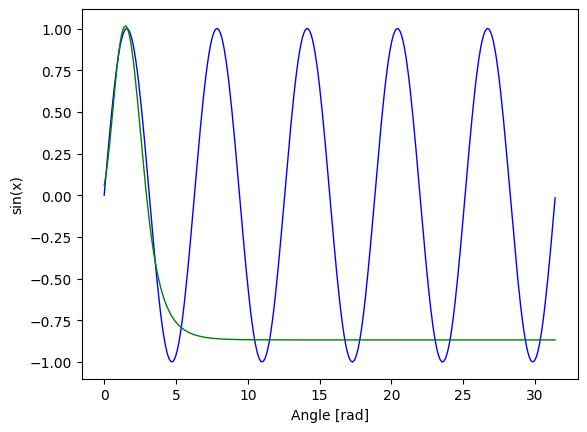

In [26]:
# Create dataset
x_test = np.arange(0, np.pi * 10, 0.1)
y_test = np.sin(x_test)
# Evaluate the model
scores = model.evaluate(x_test, y_test, verbose=VERBOSE)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1] * 100))

# Make predictions
y_pred = model.predict(x_test)

# Plot
plt.plot(x_test, y_test, color='blue', linewidth=1, markersize='1')
plt.plot(x_test, y_pred, color='green', linewidth=1, markersize='1')
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

## Genauigkeit

In [27]:
# Evaluate the model
scores = model.evaluate(x, y, verbose=VERBOSE)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1] * 100))

mean_squared_error: 4.63%


# Gewichte exportieren

In [30]:
# Function to format weights and biases as C arrays
def format_as_c_array(array, var_name, dtype="float"):
    c_array = f"{dtype} {var_name}[] = " + "{"
    if array.ndim == 1:  # Bias or single-dimension weights
        c_array += ", ".join(map(str, array.tolist()))
    elif array.ndim == 2:  # Weights
        rows, cols = array.shape
        c_array = f"{dtype} {var_name}[{rows}][{cols}] = " + "{"
        c_array += ",\n".join("{" + ", ".join(map(str, row)) + "}" for row in array)
    c_array += "};\n"
    return c_array
    
for i, layer in enumerate(model.layers):
    weights = layer.get_weights()
    if len(weights) > 0:
        w, b = weights
        print(format_as_c_array(w, f"weights_layer_{i}", dtype="float"))
        print(format_as_c_array(b, f"bias_layer_{i}", dtype="float"))


float weights_layer_0[1][5] = {{-0.940025, 0.380151, 0.5200327, 0.4343022, 0.78406924}};

float bias_layer_0[] = {0.8342049717903137, -0.27528828382492065, -1.0074617862701416, -0.20403210818767548, -0.36128801107406616};

float weights_layer_1[5][5] = {{-0.11460345, -0.64200896, 0.08240323, 0.838257, 0.959287},
{0.14622043, 0.3735112, 0.08595258, 0.9383323, 0.24393703},
{-0.056797776, -0.47232583, 0.1831359, 1.1638113, 0.7995385},
{0.012193634, -0.62377703, 0.42523837, 0.20095773, 0.6390538},
{0.81144977, -0.5480915, 0.11595223, -0.55135876, 0.06384433}};

float bias_layer_1[] = {-0.019182732328772545, 0.03272715583443642, -0.05897887796163559, 0.2689266502857208, 0.11577402055263519};

float weights_layer_2[5][1] = {{0.8319306},
{0.007486782},
{-0.39753956},
{-1.0058185},
{-0.6842462}};

float bias_layer_2[] = {0.055825281888246536};

